In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = "/content/gdrive/MyDrive/Magistrale/Stage/data"
drive.mount("/content/gdrive")
results = pd.read_csv(path + "/old_nn_results.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
results.head()

,Unnamed: 0,df,set,#_fold,#_iteration,#_epoch,loss,acc,recall,precision,...,acc_avg,acc_std,recall_avg,recall_std,precision_avg,precision_std,f2_avg,f2_std,f3_avg,f3_std
0,0,copd,train,1.0,1.0,1.0,0.078,67.46,0.98,1.47,...,74.417,7.761,35.292,27.449,38.240,28.297,33.777,26.819,34.335,27.070
1,1,copd,validation,1.0,1.0,1.0,0.042,89.58,0.00,0.00,...,89.148,2.047,31.052,22.530,29.638,22.859,28.143,19.966,29.215,20.879
2,2,copd,train,1.0,1.0,2.0,0.065,73.71,41.91,44.74,...,74.417,7.761,35.292,27.449,38.240,28.297,33.777,26.819,34.335,27.070
3,3,copd,validation,1.0,1.0,2.0,0.037,89.58,47.22,56.94,...,89.148,2.047,31.052,22.530,29.638,22.859,28.143,19.966,29.215,20.879
4,4,copd,train,1.0,1.0,3.0,0.043,84.28,70.25,68.56,...,74.417,7.761,35.292,27.449,38.240,28.297,33.777,26.819,34.335,27.070


In [ ]:
def recall_loss_plot(results, i, j): 
  x = results.loc[(results["set"]==j) & (results["#_iteration"]==i), ["#_fold", "#_epoch"]]
  x["value"] = results.loc[(results["set"]==j) & (results["#_iteration"]==i), "loss"]
  x["metric"] = "loss"

  y = results.loc[(results["set"]==j) & (results["#_iteration"]==i), ["#_fold", "#_epoch"]]
  y["value"] = results.loc[(results["set"]==j) & (results["#_iteration"]==i), "recall"]
  y["metric"] = "recall"

  data = pd.concat([x, y], axis=0)

  data["iteration"] = data["#_fold"].astype(int).astype(str) + "-" + data["#_epoch"].astype(int).astype(str)
  data.drop(data[["#_fold", "#_epoch"]], 1, inplace=True)

  data= data.reset_index(drop=True)

  sns.set(rc = {'figure.figsize':(15,5)})
  plt.figure()
  g = sns.lineplot(x = data["iteration"], y=np.log2(data["value"]), hue=data["metric"], linewidth=2.5).set(title=str(i) + "-" + j)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/l

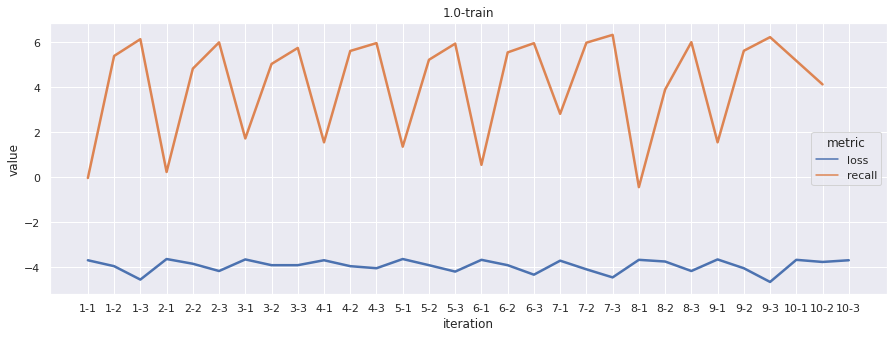

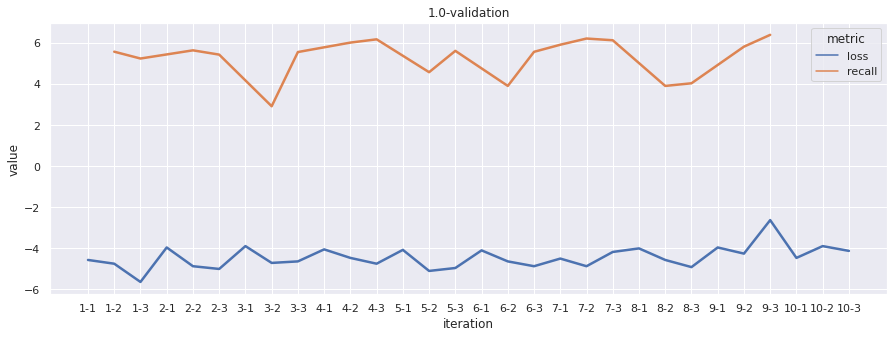

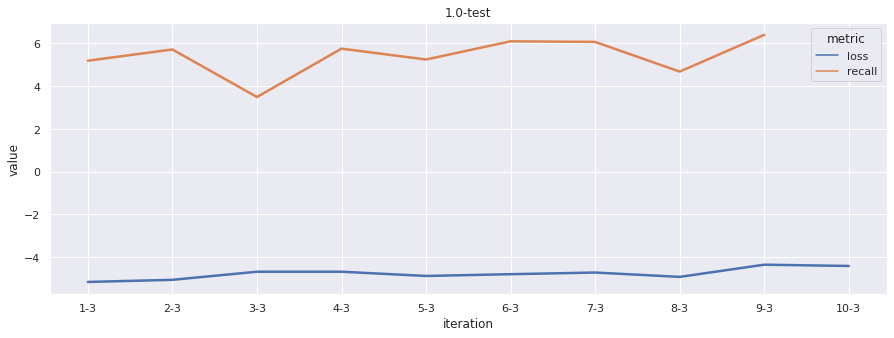

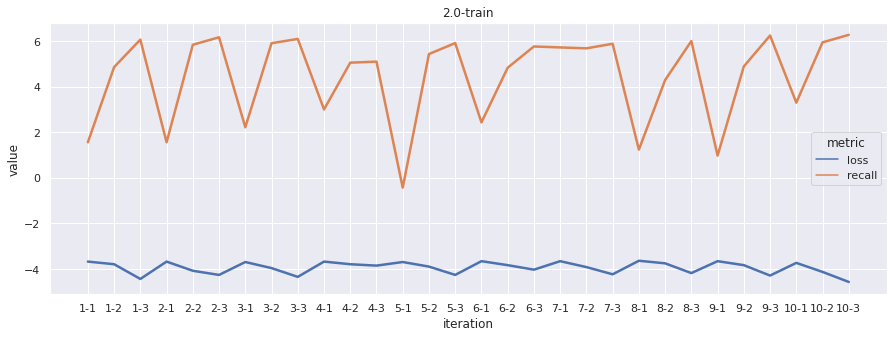

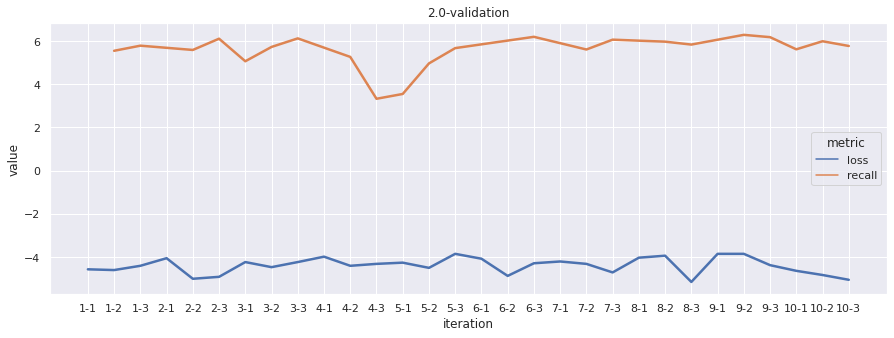

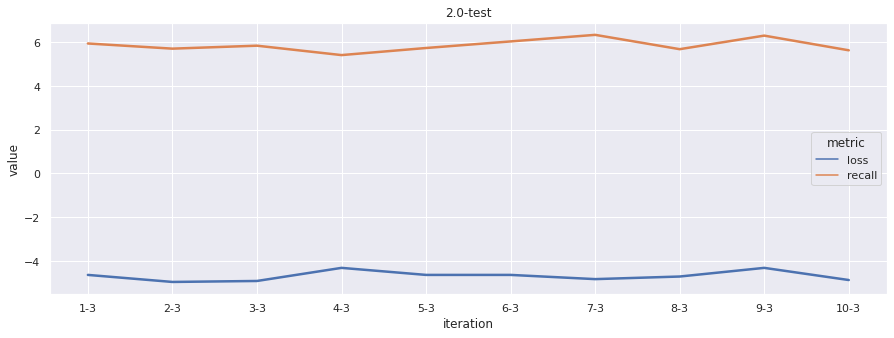

In [ ]:
for i in results["#_iteration"].unique(): 
  for j in results["set"].unique(): 
    recall_loss_plot(results, i, j)

In [ ]:
new_results = results.groupby(["set", "#_epoch"]).mean()
new_results.reset_index(level=0, inplace=True)
new_results.reset_index(level=0, inplace=True)
new_results

,#_epoch,set,Unnamed: 0,#_fold,#_iteration,loss,acc,recall,precision,f2,...,acc_avg,acc_std,recall_avg,recall_std,precision_avg,precision_std,f2_avg,f2_std,f3_avg,f3_std
0,3.0,test,72.5,5.5,1.5,0.03825,88.0505,48.3245,43.0900,43.6760,...,88.0505,0.8935,48.3245,13.0655,43.0900,9.5060,43.6760,11.1530,45.5435,11.9755
1,1.0,train,66.5,5.5,1.5,0.07860,66.6175,3.0965,2.4670,2.4040,...,73.7356,6.5232,34.6198,26.7081,37.6179,29.1067,33.2867,26.1810,33.7930,26.4019
2,2.0,train,68.5,5.5,1.5,0.06705,74.1360,39.6235,46.4300,38.2720,...,73.7356,6.5232,34.6198,26.7081,37.6179,29.1067,33.2867,26.1810,33.7930,26.4019
3,3.0,train,70.5,5.5,1.5,0.05410,80.4535,61.1395,63.9570,59.1840,...,73.7356,6.5232,34.6198,26.7081,37.6179,29.1067,33.2867,26.1810,33.7930,26.4019
4,1.0,validation,67.5,5.5,1.5,0.05590,89.3460,7.6805,7.7335,7.1130,...,86.5442,5.0236,33.5736,26.2355,25.8303,18.5487,28.6544,21.3911,30.5613,23.2168
5,2.0,validation,69.5,5.5,1.5,0.04395,86.2500,41.0145,33.0150,35.1390,...,86.5442,5.0236,33.5736,26.2355,25.8303,18.5487,28.6544,21.3911,30.5613,23.2168
6,3.0,validation,71.5,5.5,1.5,0.04735,84.0365,52.0260,36.7425,43.7115,...,86.5442,5.0236,33.5736,26.2355,25.8303,18.5487,28.6544,21.3911,30.5613,23.2168


In [ ]:
def recall_loss_plot2(results, j): 
  x = results.loc[(results["set"]==j),  ["set", "#_epoch"]]
  x["value"] = results.loc[(results["set"]==j), "loss"]
  x["metric"] = "loss"

  y = results.loc[(results["set"]==j),  ["set", "#_epoch"]]
  y["value"] = results.loc[(results["set"]==j), "recall"]
  y["metric"] = "recall"

  data = pd.concat([x, y], axis=0)

  if not data.empty: 

    data["iteration"] = data["#_epoch"].astype(int).astype(str)
    data.drop(data[["set", "#_epoch"]], 1, inplace=True)

    data= data.reset_index(drop=True)
    
    sns.set(rc = {'figure.figsize':(15,5)})
    plt.figure()
    g = sns.lineplot(x = data["iteration"], y=np.log2(data["value"]), hue=data["metric"], linewidth=2.5).set(title=str(i) + "-" + j)
    plt.legend(loc='center right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


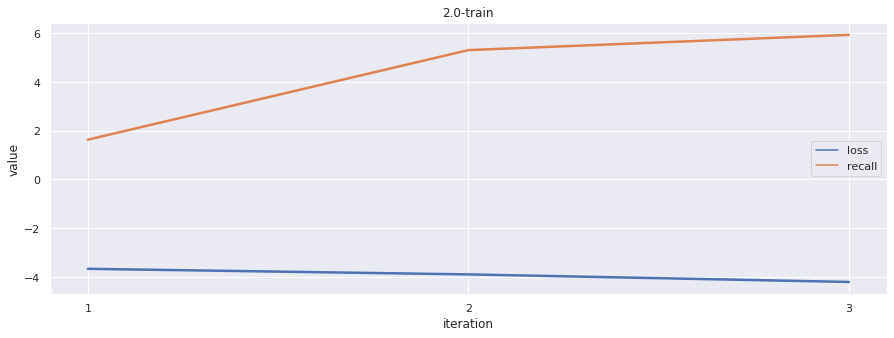

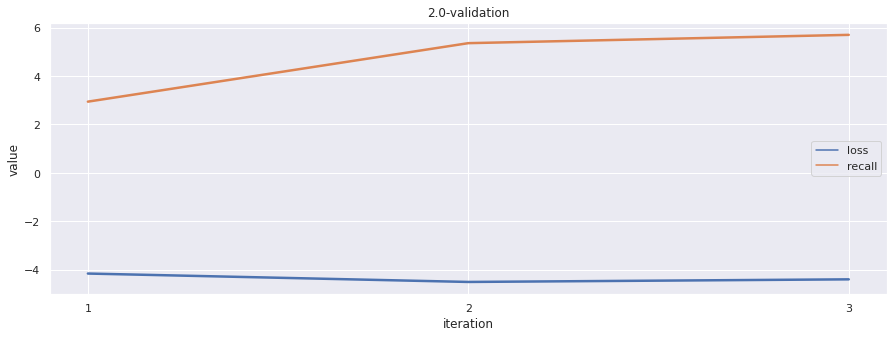

In [ ]:
for j in ["train", "validation"]:
  recall_loss_plot2(new_results, j)